# Clustering

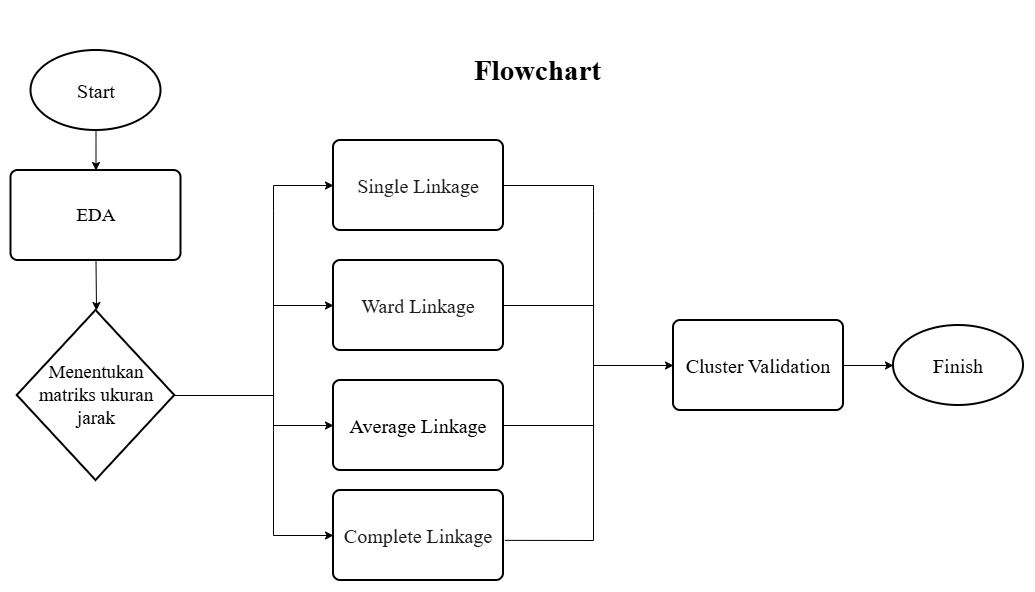

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# Import Datasets

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
customer = pd.read_csv("/content/gdrive/My Drive/Colab/tugas clustering.csv")
customer.info()

Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   Gender                1000 non-null   object 
 2   Age                   1000 non-null   int64  
 3   Driving_License       1000 non-null   int64  
 4   Region_Code           1000 non-null   float64
 5   Previously_Insured    1000 non-null   int64  
 6   Vehicle_Age           1000 non-null   object 
 7   Vehicle_Damage        1000 non-null   object 
 8   Annual_Premium        1000 non-null   float64
 9   Policy_Sales_Channel  1000 non-null   float64
 10  Vintage               1000 non-null   int64  
 11  Response              1000 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 93.9+ KB


Terdapat 12 variabel dengan 1000 entries

# Pre-processing Data

In [ ]:
customer.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,100000,Male,22,1,8.0,0,< 1 Year,Yes,36513.0,160.0,189,0
1,100001,Male,24,1,36.0,0,< 1 Year,Yes,2630.0,160.0,268,0
2,100002,Female,22,1,15.0,0,< 1 Year,Yes,35832.0,152.0,289,0
3,100003,Male,72,1,28.0,0,> 2 Years,Yes,36685.0,26.0,113,0
4,100004,Male,66,1,28.0,0,> 2 Years,Yes,2630.0,45.0,123,1


## Data Cleaning

In [ ]:
# check missing value
customer.isna().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


Tidak terdapat missing value di dalam data

In [ ]:
# check duplicated id
customer.duplicated(subset="Response").sum()

np.int64(998)

Tidak terdapat data duplicated berdasarkan variabel Response

In [ ]:
# drop kolom karena tidak bermakna
customer_clean = customer.drop(columns=["Response","id","Gender","Driving_License","Region_Code","Previously_Insured"])

drop/hapus beberapa variabel karena hanya data object dan Kode numerik kategorikal bukan nilai numerik yang menggambarkan hubungan atau jarak

In [ ]:
# deskripsi statistik
customer_clean.describe()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.653000,30364.102000,108.303000,154.565000
std,15.776929,16348.152121,55.577442,83.320815
min,20.000000,2630.000000,1.000000,10.000000
25%,25.000000,24415.250000,26.000000,88.000000
50%,38.000000,31511.500000,124.000000,154.000000
75%,50.250000,39555.750000,152.000000,227.000000
max,85.000000,100278.000000,163.000000,299.000000


Karena terdapat perbedaan skala antar variabel maka dilakukan feature scaling

## feature scaling

In [ ]:
# minmax scaler sklearn
scaler = MinMaxScaler()
numeric_cols = customer_clean.select_dtypes(include=['int64','float64']).columns
customer_scaled = scaler.fit_transform(customer_clean[numeric_cols])
pd.DataFrame(customer_scaled).describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.302354,0.284021,0.662364,0.500225
std,0.242722,0.167419,0.343071,0.288307
min,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.223100,0.154321,0.269896
50%,0.276923,0.295772,0.759259,0.498270
75%,0.465385,0.378152,0.932099,0.750865
max,1.000000,1.000000,1.000000,1.000000


Menyelaraskan skala data ke rentang [0, 1]

## visualisasi

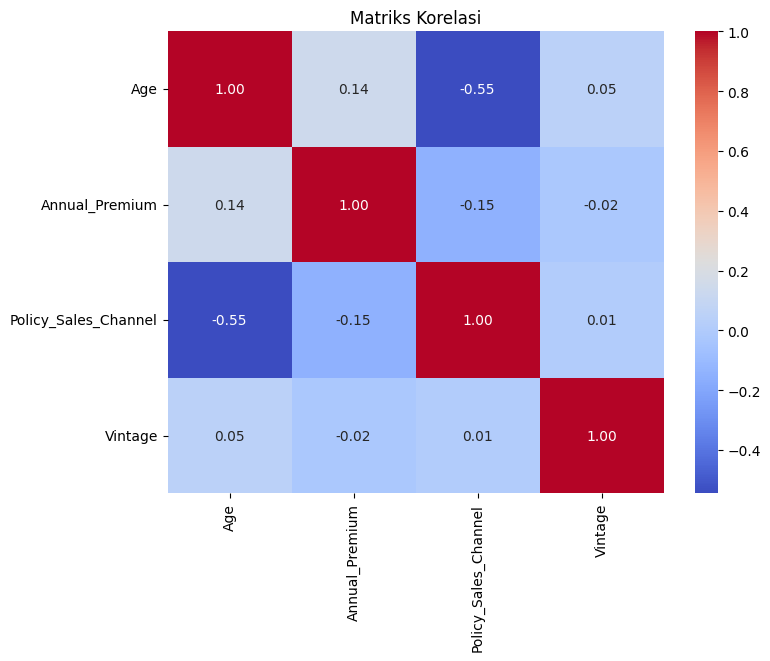

In [ ]:
import pandas as pd

# Matriks korelasi
plt.figure(figsize=(8, 6))
# Convert customer_scaled numpy array back to a DataFrame to use .corr()
# We use the numeric_cols from before to restore the column names
customer_scaled_df = pd.DataFrame(customer_scaled, columns=numeric_cols)
sns.heatmap(customer_scaled_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

Menampilkan hubungan antara variabel

Matriks korelasi ini memberi gambaran apakah ada korelasi antar variabel di data.

# Matriks ukuran jarak

In [ ]:
# ============================
# 1. Jarak Euclidean
# ============================
dist_euclidean = squareform(pdist(customer_scaled, metric='euclidean'))
df_euclidean = pd.DataFrame(dist_euclidean)

# ============================
# 2. Jarak Manhattan
# ============================
dist_manhattan = squareform(pdist(customer_scaled, metric='cityblock'))
df_manhattan = pd.DataFrame(dist_manhattan)

# ============================
# 3. Jarak Canberra
# ============================
dist_canberra = squareform(pdist(customer_scaled, metric='canberra'))
df_canberra = pd.DataFrame(dist_canberra)

# Tampilkan hasil
print("Jarak Euclidean:\n", df_euclidean)
print("\nJarak Manhattan:\n", df_manhattan)
print("\nJarak Canberra:\n", df_canberra)

Jarak Euclidean:
           0         1         2         3         4         5         6    \
0    0.000000  0.442802  0.349596  1.159771  1.065226  0.932927  0.349137   
1    0.442802  0.000000  0.352530  1.280156  1.083131  0.920450  0.281899   
2    0.349596  0.352530  0.000000  1.252041  1.157591  0.839157  0.076763   
3    1.159771  1.280156  1.252041  0.000000  0.380923  0.728261  1.230745   
4    1.065226  1.083131  1.157591  0.380923  0.000000  0.715871  1.115808   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.422939  0.466240  0.435703  0.964816  0.861183  0.795193  0.398562   
996  0.985097  1.101015  1.006233  0.376785  0.548205  0.403295  0.997806   
997  0.171694  0.304474  0.212538  1.170282  1.052168  0.850478  0.192783   
998  0.497052  0.620491  0.478360  0.836543  0.815370  0.640465  0.468750   
999  0.183031  0.517337  0.396510  1.041884  0.978677  0.882272  0.394653   

          7         8         9    ...       990       99

# Agglomerative Clustering

## Metode linkage single

In [ ]:
# train agglomerative clustering with 5 clusters, linkage="single"
agg_clus_single = AgglomerativeClustering(n_clusters=5,linkage="single")
agg_clus_single.fit(customer_scaled)

AgglomerativeClustering(linkage='single', n_clusters=5)

Melakukan Hierarchical Clustering dengan linkage “single” (jarak minimum antar titik) dengan menetapkan 5 cluster

In [ ]:
# assign clusters to customer dataframe
customer["label_single"] = agg_clus_single.labels_
customer.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,label_single
0,100000,Male,22,1,8.0,0,< 1 Year,Yes,36513.0,160.0,189,0,0
1,100001,Male,24,1,36.0,0,< 1 Year,Yes,2630.0,160.0,268,0,0
2,100002,Female,22,1,15.0,0,< 1 Year,Yes,35832.0,152.0,289,0,0
3,100003,Male,72,1,28.0,0,> 2 Years,Yes,36685.0,26.0,113,0,1
4,100004,Male,66,1,28.0,0,> 2 Years,Yes,2630.0,45.0,123,1,1


Label hasil cluster disimpan dalam kolom label_single

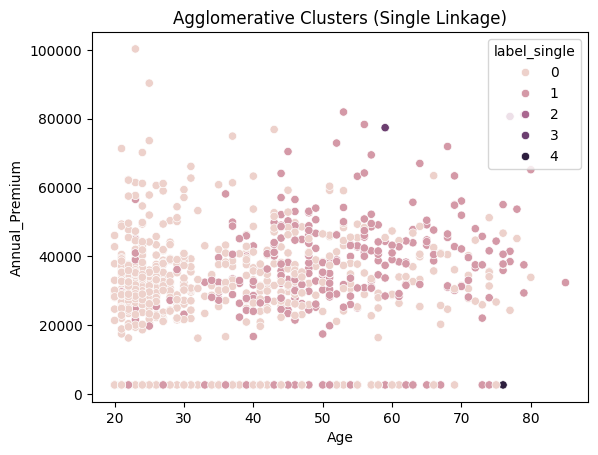

In [ ]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium",hue="label_single")
plt.title("Agglomerative Clusters (Single Linkage)")
plt.show()

Cluster hasil single linkage tidak praktikal (berguna secara nyata) karena sebagian besar titik masuk ke cluster 0 (fenomena chaining effect atau data saling “menarik” jadi satu kelompok besar).

## Metode linkage ward

In [ ]:
# train agglomerative clustering with 5 clusters, linkage="ward"
agg_clus_ward = AgglomerativeClustering(n_clusters=5,linkage="ward")
agg_clus_ward.fit(customer_scaled)

AgglomerativeClustering(n_clusters=5)

Melakukan Hierarchical Clustering dengan linkage “ward” (mencari pasangan-pasangan cluster yang meminimumkan variance ketika digabung) dengan menetapkan 5 cluster

In [ ]:
# assign clusters to customer dataframe
customer["label_ward"] = agg_clus_ward.labels_
customer.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,label_single,label_ward
0,100000,Male,22,1,8.0,0,< 1 Year,Yes,36513.0,160.0,189,0,0,0
1,100001,Male,24,1,36.0,0,< 1 Year,Yes,2630.0,160.0,268,0,0,0
2,100002,Female,22,1,15.0,0,< 1 Year,Yes,35832.0,152.0,289,0,0,0
3,100003,Male,72,1,28.0,0,> 2 Years,Yes,36685.0,26.0,113,0,1,4
4,100004,Male,66,1,28.0,0,> 2 Years,Yes,2630.0,45.0,123,1,1,4


Label hasil cluster disimpan dalam kolom label_ward

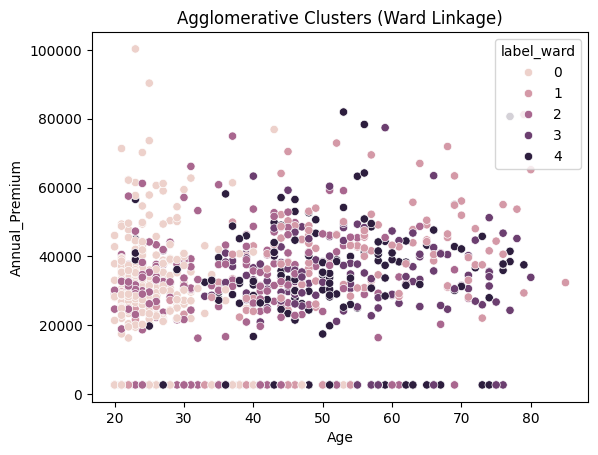

In [ ]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium",hue="label_ward")
plt.title("Agglomerative Clusters (Ward Linkage)")
plt.show()

Hasil visualisasi terlihat lebih jelas dan terpisah antar cluster

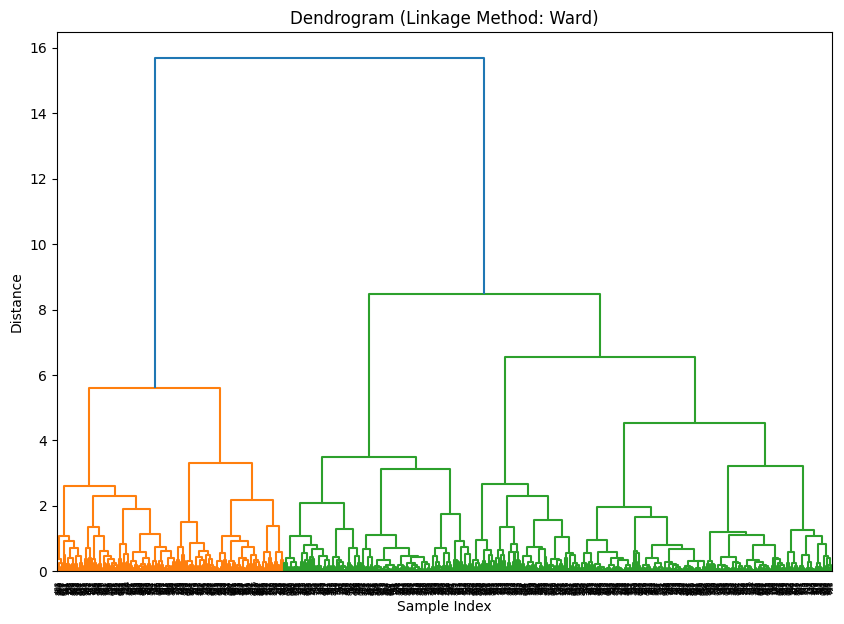

In [ ]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scaled, method="ward")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: Ward)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Menampilkan struktur hierarki penggabungan cluster. Namun karena data 1000 titik, dendrogram menjadi sulit dibaca dan hanya membantu melihat jarak antar penggabungan cluster.

## Metode linkage average

In [ ]:
# train agglomerative clustering with 5 clusters, linkage="average"
agg_clus_average = AgglomerativeClustering(n_clusters=5,linkage="average")
agg_clus_average.fit(customer_scaled)

AgglomerativeClustering(linkage='average', n_clusters=5)

Melakukan Hierarchical Clustering dengan linkage “average” (rata-rata jarak dari semua kombinasi pasangan cluster) dengan menetapkan 5 cluster

In [ ]:
# assign clusters to customer dataframe
customer["label_average"] = agg_clus_average.labels_
customer.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,label_single,label_ward,label_average
0,100000,Male,22,1,8.0,0,< 1 Year,Yes,36513.0,160.0,189,0,0,0,3
1,100001,Male,24,1,36.0,0,< 1 Year,Yes,2630.0,160.0,268,0,0,0,3
2,100002,Female,22,1,15.0,0,< 1 Year,Yes,35832.0,152.0,289,0,0,0,3
3,100003,Male,72,1,28.0,0,> 2 Years,Yes,36685.0,26.0,113,0,1,4,1
4,100004,Male,66,1,28.0,0,> 2 Years,Yes,2630.0,45.0,123,1,1,4,1


Label hasil cluster disimpan dalam kolom label_average

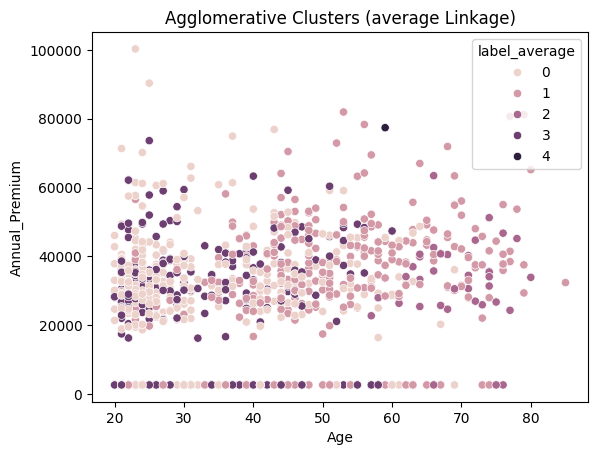

In [ ]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium",hue="label_average")
plt.title("Agglomerative Clusters (average Linkage)")
plt.show()

Scatter plot menunjukkan pola pengelompokan yang cukup rapi

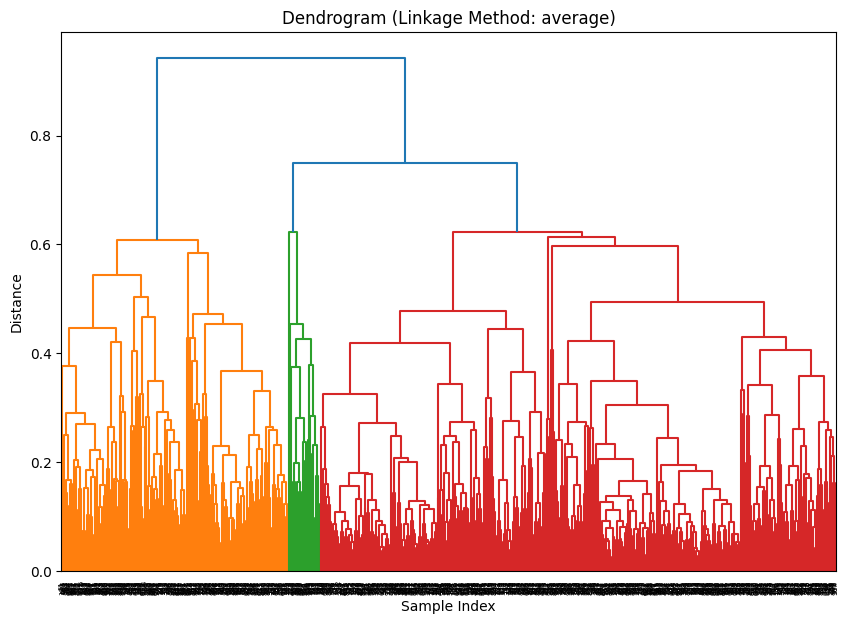

In [ ]:
# Plot the dendrogram
linkage_matrix = linkage(customer_scaled, method="average")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: average)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Menampilkan struktur hierarki penggabungan cluster. Namun karena data 1000 titik, dendrogram menjadi sulit dibaca dan hanya membantu melihat jarak antar penggabungan cluster.

## Metode linkage complete

In [ ]:
# train agglomerative clustering with 5 clusters, linkage="complete"
agg_clus_complete = AgglomerativeClustering(n_clusters=5,linkage="complete")
agg_clus_complete.fit(customer_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

Melakukan Hierarchical Clustering dengan linkage “complete” (jarak maksimum antar titik) dengan menetapkan 5 cluster

In [ ]:
# assign clusters to customer dataframe
customer["label_complete"] = agg_clus_complete.labels_
customer.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,label_single,label_ward,label_average,label_complete
0,100000,Male,22,1,8.0,0,< 1 Year,Yes,36513.0,160.0,189,0,0,0,3,3
1,100001,Male,24,1,36.0,0,< 1 Year,Yes,2630.0,160.0,268,0,0,0,3,2
2,100002,Female,22,1,15.0,0,< 1 Year,Yes,35832.0,152.0,289,0,0,0,3,2
3,100003,Male,72,1,28.0,0,> 2 Years,Yes,36685.0,26.0,113,0,1,4,1,1
4,100004,Male,66,1,28.0,0,> 2 Years,Yes,2630.0,45.0,123,1,1,4,1,1


Label hasil cluster disimpan dalam kolom label_complete

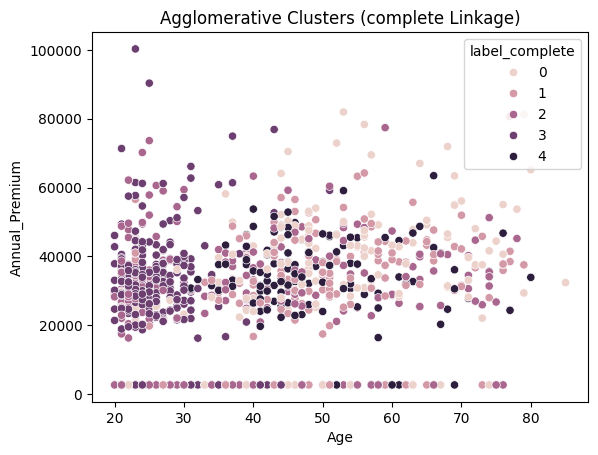

In [ ]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium",hue="label_complete")
plt.title("Agglomerative Clusters (complete Linkage)")
plt.show()

Scatter plot memperlihatkan pengelompokan yang cukup baik

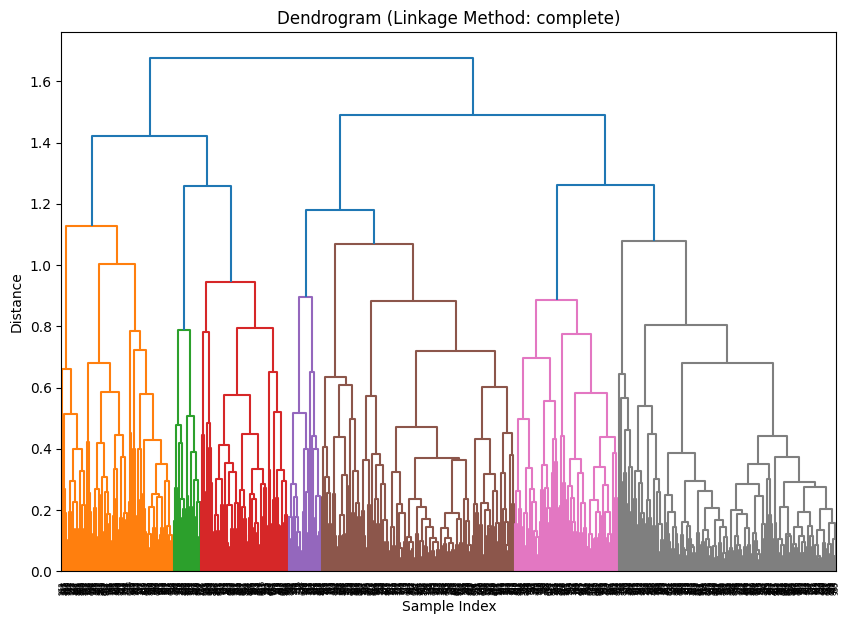

In [ ]:
# Plot the dendrogram
linkage_matrix = linkage(customer_scaled, method="complete")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: complete)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Menampilkan struktur hierarki penggabungan cluster. Namun karena data 1000 titik, dendrogram menjadi sulit dibaca dan hanya membantu melihat jarak antar penggabungan cluster.

# cluster validation menggunakan koefisien silhouette

Kriteria pengukuran nilai Silhouette coefficient disajikan pada tabel dibawah

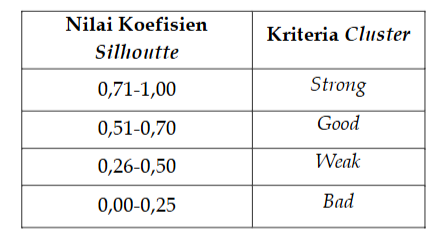

Nilai rata-rata Silhouette menunjukkan kedekatan dan
kemiripan data yang dikelompokkan dalam satu
cluster. Jika nilai rata-rata koefisien silhoutte
semakin mendekati 1 berarti suatu objek
sudah berada dalam cluster yang tepat

In [ ]:
# --- Daftar metode linkage dan jenis jarak yang diuji ---
linkages = ['single', 'complete', 'average', 'ward']
metrics = ['euclidean', 'manhattan', 'canberra']

# --- Simpan hasil ke list ---
results = []

for linkage in linkages:
    # Jalankan clustering (Ward hanya bisa pakai Euclidean)
    if linkage == 'ward':
        model = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
        labels = model.fit_predict(customer_scaled)

        # Setelah Ward selesai, hitung silhouette pakai 3 jenis jarak
        for metric in metrics:
            score = silhouette_score(customer_scaled, labels, metric=metric)
            results.append([linkage, metric, round(score, 2)])
    else:
        # Untuk single/complete/average bisa langsung gunakan setiap metric
        for metric in metrics:
            model = AgglomerativeClustering(n_clusters=5, linkage=linkage, metric=metric)
            labels = model.fit_predict(customer_scaled)
            score = silhouette_score(customer_scaled, labels, metric=metric)
            results.append([linkage, metric, round(score, 2)])

# --- Ubah ke DataFrame agar mudah dibaca ---
df_results = pd.DataFrame(results, columns=['Metode', 'Jarak', 'Silhouette'])
tabel = df_results.pivot(index='Metode', columns='Jarak', values='Silhouette')

# --- Urutkan & ubah label agar sesuai dengan tabel di gambar kamu ---
tabel = tabel.loc[['single', 'complete', 'average', 'ward'], ['euclidean', 'manhattan', 'canberra']]
tabel.columns = ['Jarak Euclidean', 'Jarak Manhattan', 'Jarak Canberra']
tabel.index = ['Single Linkage', 'Complete Linkage', 'Average Linkage', 'Ward Linkage']

# --- Tampilkan hasil akhir ---
print("Tabel Silhouette Coefficient:")
display(tabel)

Tabel Silhouette Coefficient:


,Jarak Euclidean,Jarak Manhattan,Jarak Canberra
Single Linkage,0.26,0.24,0.12
Complete Linkage,0.28,0.26,0.34
Average Linkage,0.31,0.29,0.37
Ward Linkage,0.29,0.30,0.16


Berdasarkan hasil perbandingan nilai Silhouette Coefficient pada berbagai metode linkage dan jenis jarak, dapat disimpulkan bahwa metode Complete Linkage dengan jarak Canberra memberikan hasil pengelompokan terbaik dengan nilai tertinggi sebesar 0,34, yang menunjukkan bahwa cluster yang terbentuk cukup kompak dan terpisah dengan baik. Metode Average Linkage juga menghasilkan nilai yang relatif tinggi dan stabil di semua jenis jarak, sehingga dapat dianggap sebagai alternatif yang seimbang. Sementara itu, Single Linkage menunjukkan performa terendah akibat efek chaining yang menyebabkan batas antar cluster tidak jelas, dan Ward Linkage hanya memberikan hasil cukup baik pada jarak Euclidean namun kurang efektif pada jarak non-Euclidean seperti Canberra. Secara keseluruhan, kombinasi Complete Linkage dan jarak Canberra disimpulkan sebagai pendekatan paling optimal untuk clustering pada data ini.